<a href="https://colab.research.google.com/github/zainamri/tengoknijelah/blob/main/apakah_fiks_maniez%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import skew, norm, probplot
from scipy.stats import skew, kurtosis
from scipy import stats
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Melakukan import dataset "Seoul Bike".
# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/awikwok/SeoulBikeData.csv", encoding='latin-1') # Try 'latin-1' encoding
# If 'latin-1' doesn't work, you may need to experiment with other encodings like 'ISO-8859-1'

In [ ]:
# Menampilkan beberapa baris pertama dari dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Menampilkan struktur dataset
print("\nStruktur dataset:")
df.info()


Struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            87

In [ ]:
# Mengecek missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


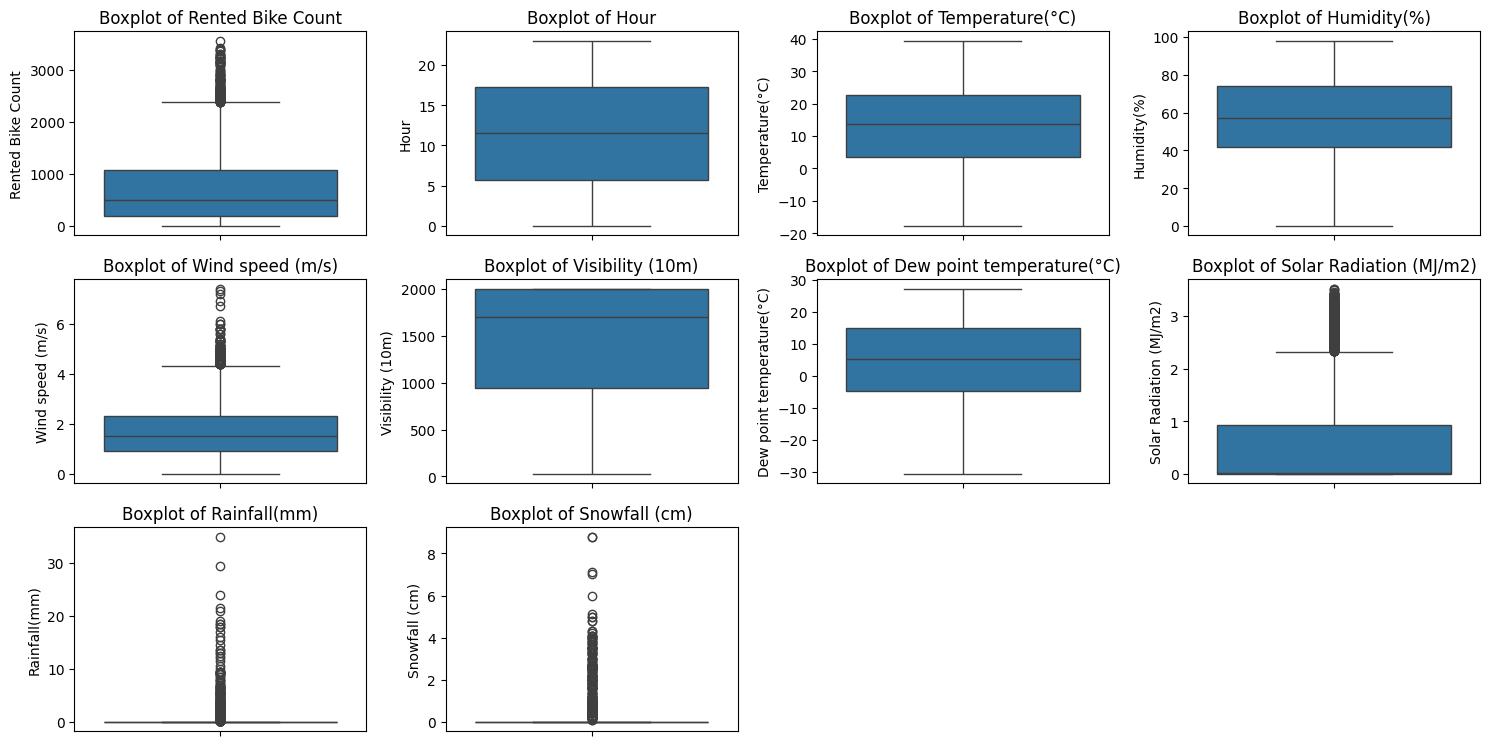

Jumlah outlier di setiap kolom:
Rented Bike Count          158
Wind speed (m/s)           161
Solar Radiation (MJ/m2)    641
Rainfall(mm)               528
Snowfall (cm)              443
dtype: int64


In [ ]:
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')

# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Mengecek outliers dengan menggunakan boxplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Menampilkan jumlah outlier di setiap kolom
outlier_counts = outliers.sum()
print("Jumlah outlier di setiap kolom:")
print(outlier_counts[outlier_counts > 0])


In [ ]:
# Mengecek unique values
unique_values = df.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


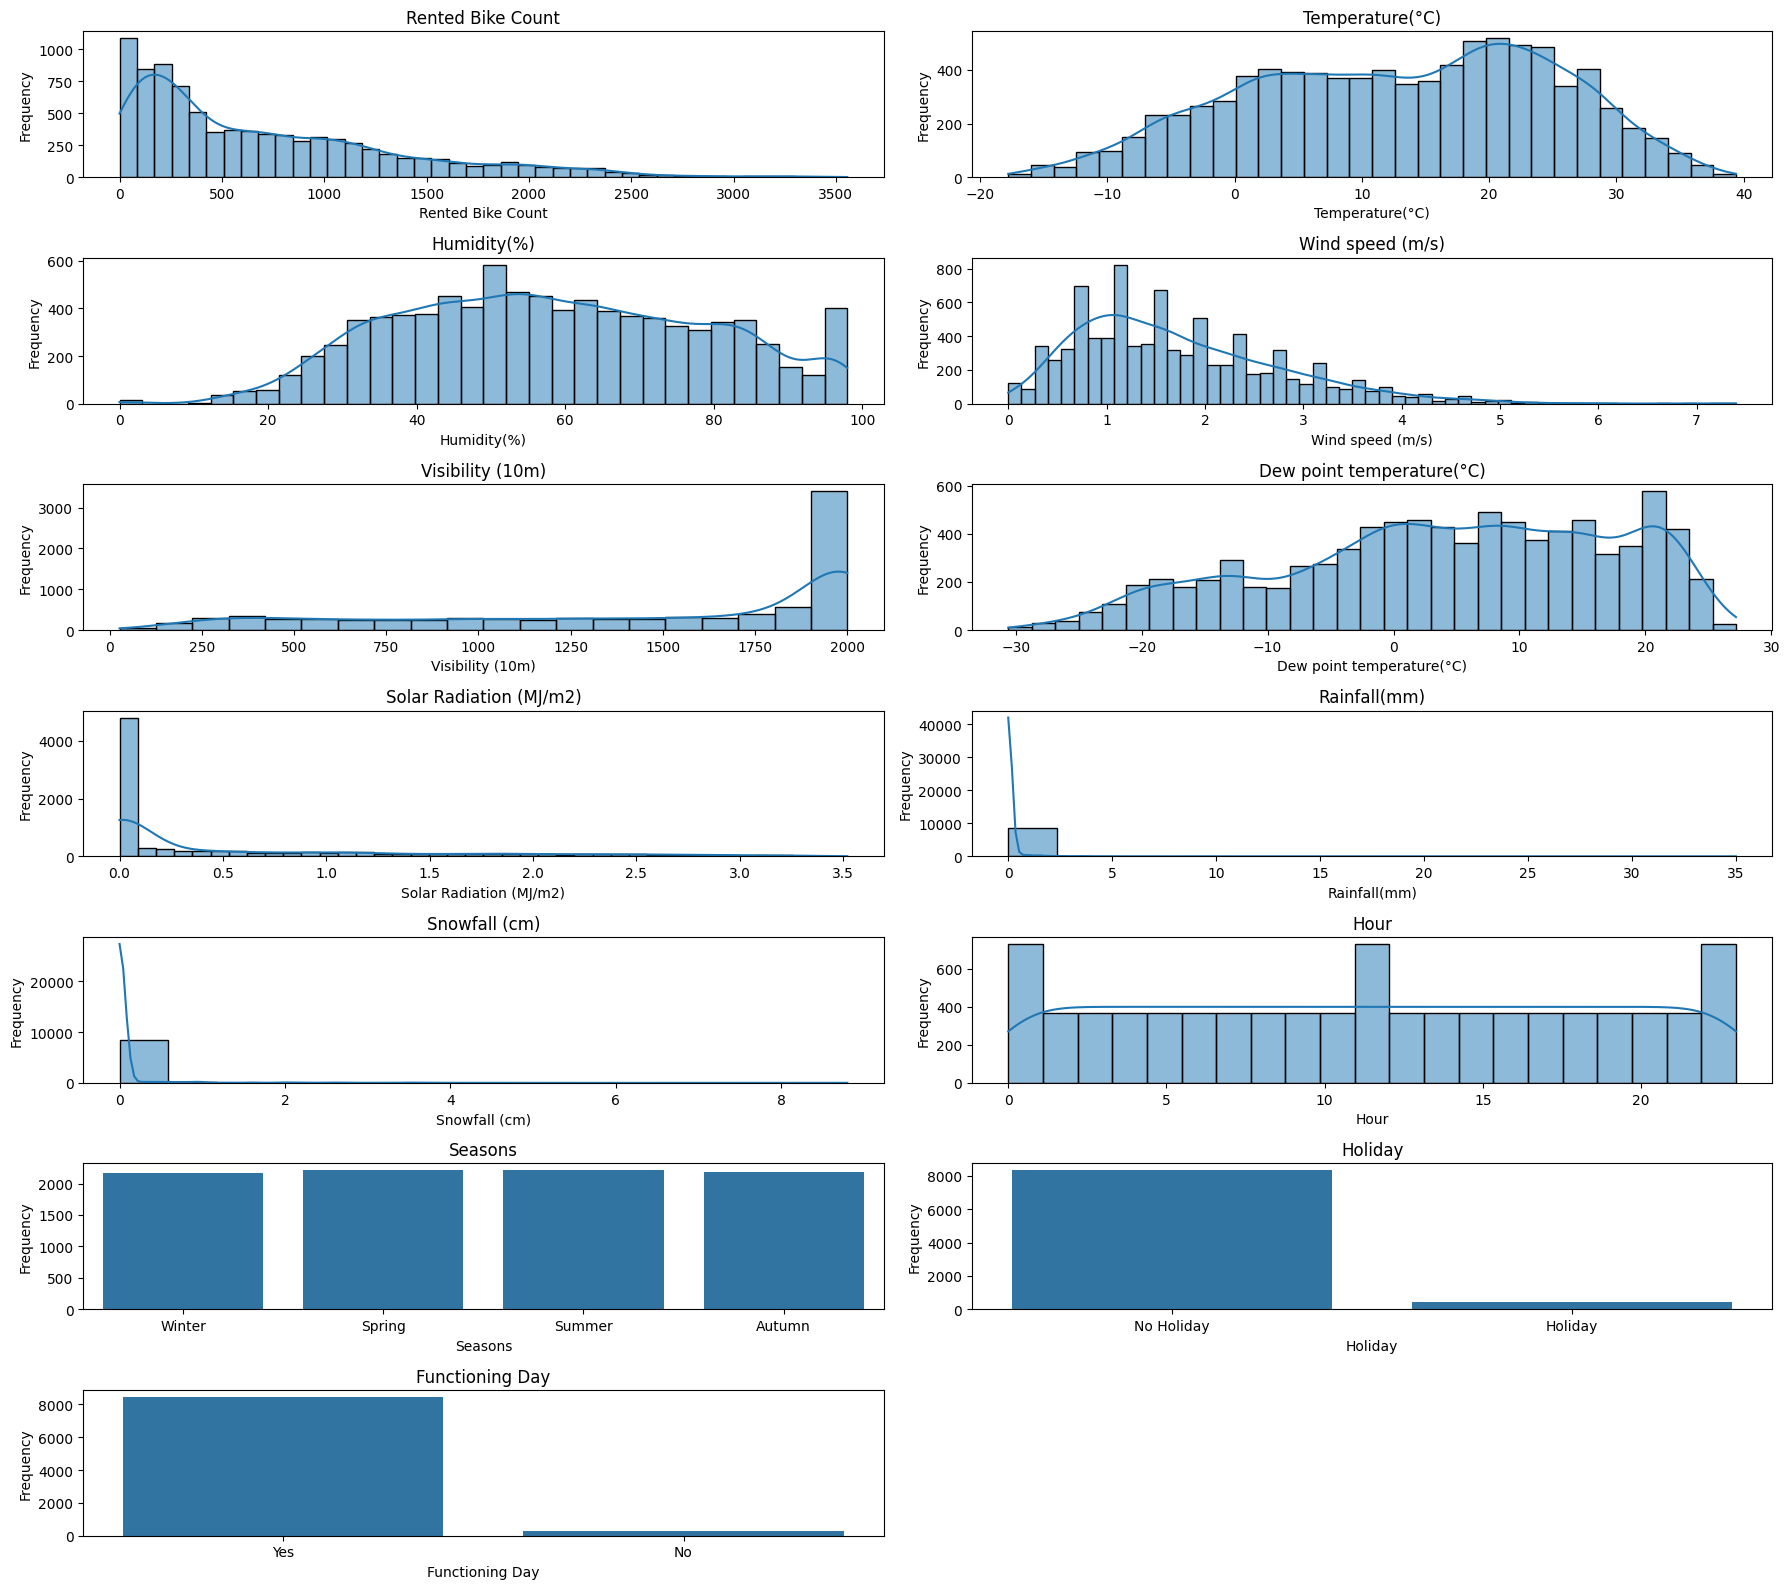

In [ ]:
# List of all columns
all_columns_to_plot = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
                       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                       'Hour', 'Seasons', 'Holiday', 'Functioning Day']

# Create subplots for all columns
plt.figure(figsize=(18, 16))
for i, column in enumerate(all_columns_to_plot, 1):
    plt.subplot(7, 2, i)
    if df[column].dtype == 'object':  # Categorical data
        sns.countplot(data=df, x=column)
    else:  # Numerical data
        sns.histplot(data=df, x=column, kde=True)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

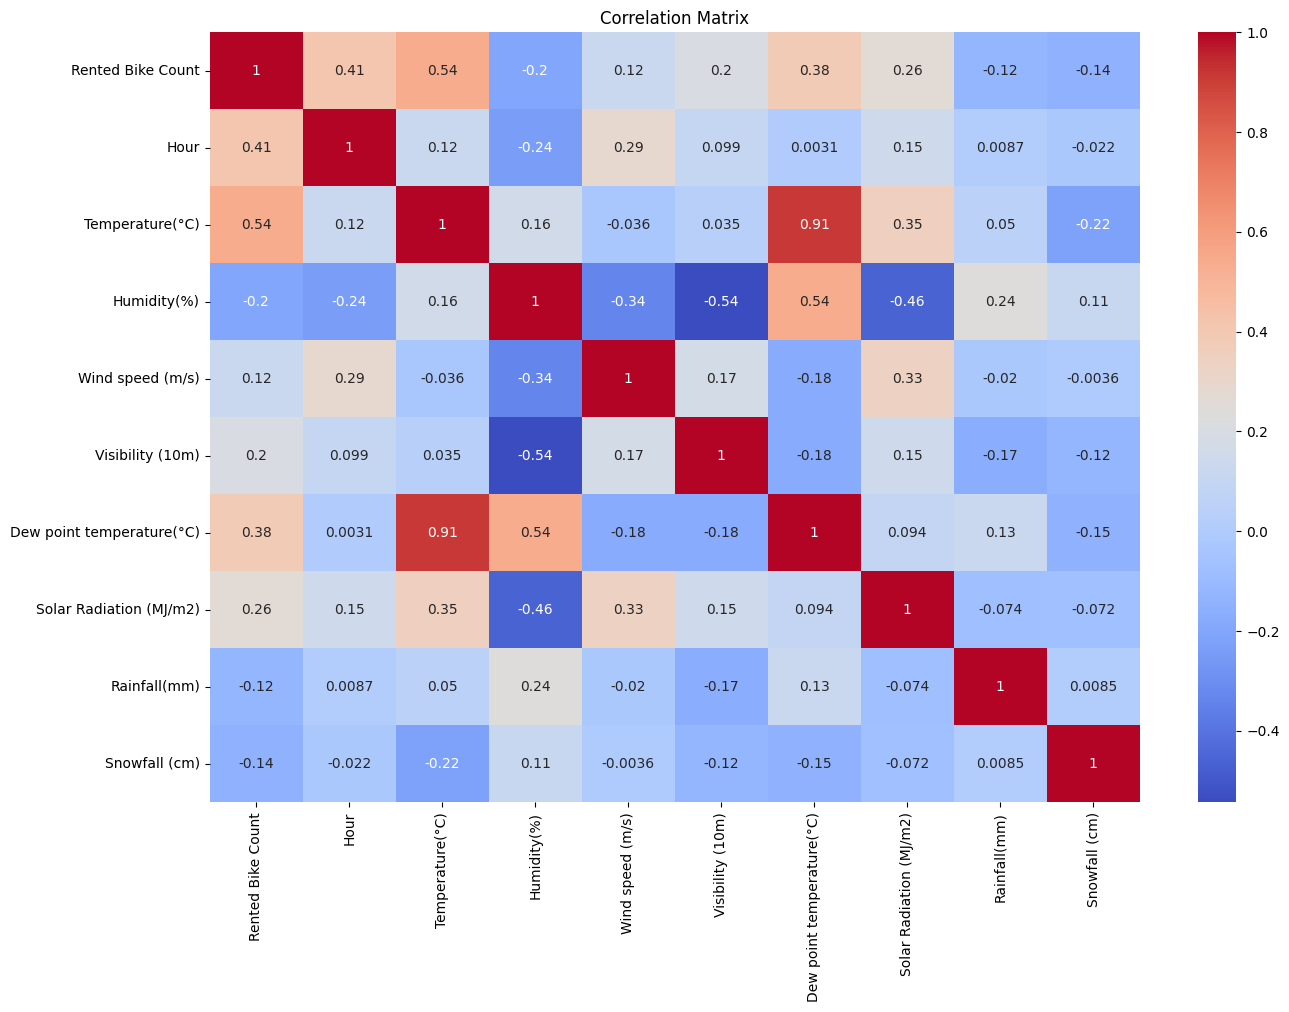

Korelasi dengan 'Rented Bike Count':
 Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


In [ ]:
# Menghapus kolom non-numerik sebelum menghitung korelasi
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Melihat korelasi dengan 'Rented Bike Count'
bike_corr = correlation_matrix["Rented Bike Count"].sort_values(ascending=False)
print("Korelasi dengan 'Rented Bike Count':\n", bike_corr)


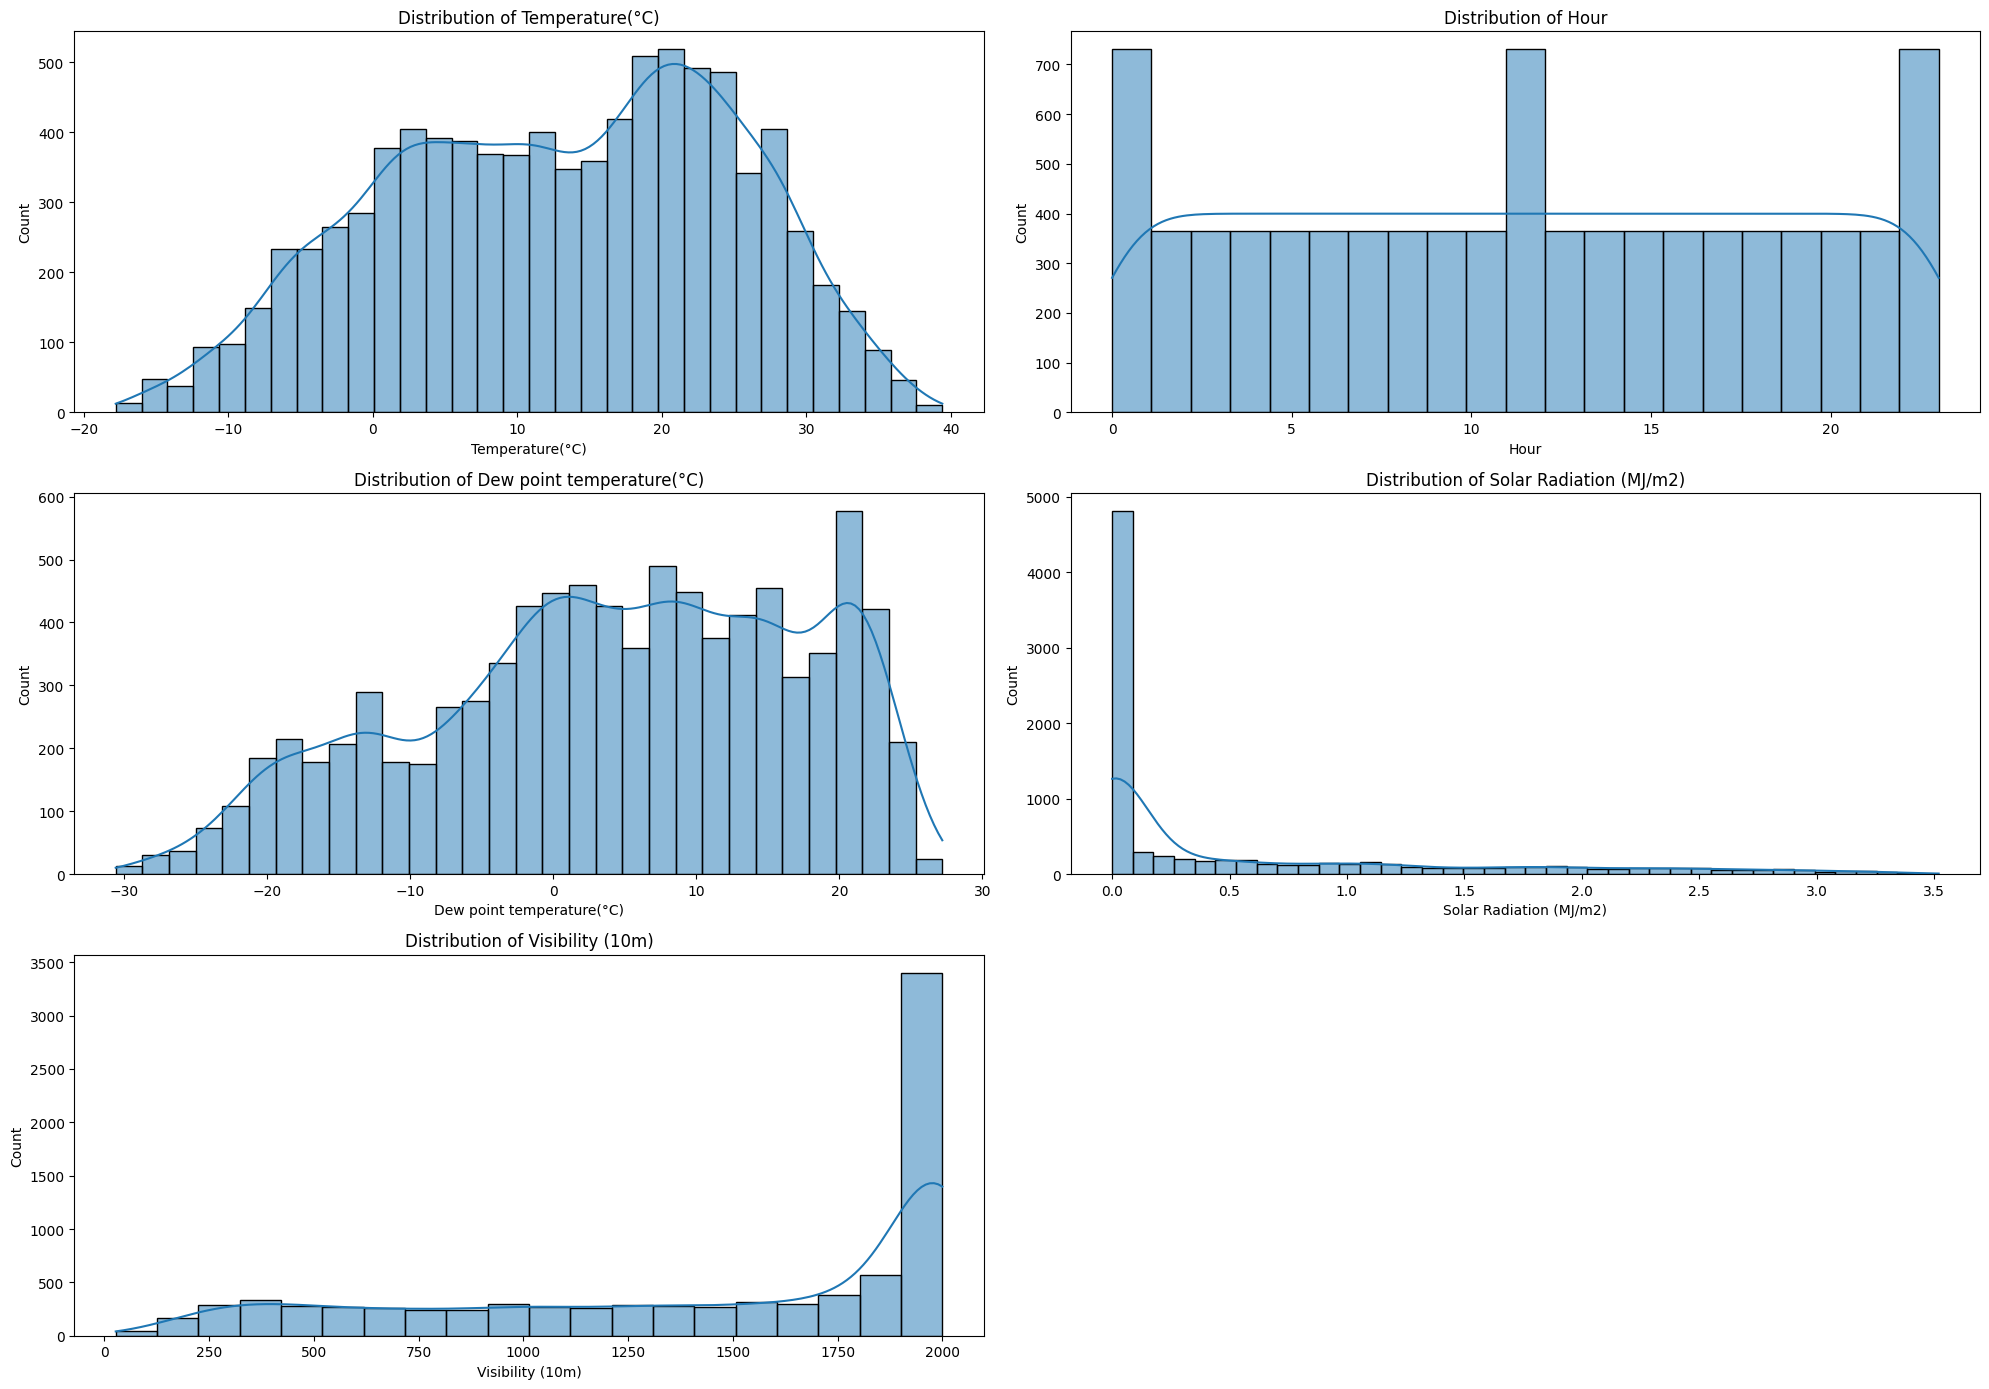

In [ ]:
# Menampilkan distribusi atribut yang berkorelasi tinggi dengan 'Rented Bike Count'
high_corr_attributes = bike_corr[1:6].index  # Memilih 5 atribut dengan korelasi tertinggi

plt.figure(figsize=(20, 14))
for i, col in enumerate(high_corr_attributes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Statistik deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Setelah data understanding

In [ ]:
# Mengubah Tipe Data
df = df.copy()  # Membuat salinan eksplisit dari DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Menangani Outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers dan hapus dari DataFrame asli
outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df.loc[~outliers].copy()

# Normalisasi atau Standarisasi Data
scaler = StandardScaler()
numerical_cols_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_cleaned.loc[:, numerical_cols_cleaned.columns] = scaler.fit_transform(numerical_cols_cleaned)

# Feature Engineering
df_cleaned.loc[:, 'Year'] = df_cleaned['Date'].dt.year
df_cleaned.loc[:, 'Month'] = df_cleaned['Date'].dt.month
df_cleaned.loc[:, 'Day'] = df_cleaned['Date'].dt.day
df_cleaned.loc[:, 'DayOfWeek'] = df_cleaned['Date'].dt.dayofweek
df_cleaned.loc[:, 'WeekOfYear'] = df_cleaned['Date'].dt.isocalendar().week

# Menghapus kolom 'Date' jika tidak diperlukan lagi
df_cleaned.drop(columns=['Date'], inplace=True)

# One-Hot Encoding untuk kolom kategorikal
df_cleaned = pd.get_dummies(df_cleaned, columns=['Seasons', 'Holiday', 'Functioning Day'])

# Menentukan target variabel
df_cleaned['HighRentals'] = (df_cleaned['Rented Bike Count'] > df_cleaned['Rented Bike Count'].mean()).astype(int)

# Memisahkan fitur dan target
X = df_cleaned.drop(columns=['Rented Bike Count', 'HighRentals'])
y = df_cleaned['HighRentals']

# Menyimpan data yang sudah dipersiapkan untuk tahap modeling
df_cleaned.to_csv("/content/drive/MyDrive/awikwok/SeoulBikeData_Cleaned.csv", index=False)

# Menampilkan 5 baris pertama dari dataset yang sudah dipersiapkan
print(df_cleaned.head())

   Rented Bike Count      Hour  Temperature(°C)  Humidity(%)  \
0          -0.749236 -1.559650        -1.543372    -1.112270   
1          -0.832246 -1.421316        -1.569581    -1.058872   
2          -0.883711 -1.282981        -1.613263    -1.005474   
3          -0.993283 -1.144647        -1.630735    -0.952076   
4          -1.041429 -1.006312        -1.613263    -1.165668   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          0.638114          0.903962                  -1.662197   
1         -0.862453          0.903962                  -1.662197   
2         -0.648086          0.903962                  -1.669984   
3         -0.755270          0.903962                  -1.662197   
4          0.745298          0.903962                  -1.740068   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ...  WeekOfYear  \
0                -0.635957           0.0            0.0  ...          48   
1                -0.635957           0.0            0.

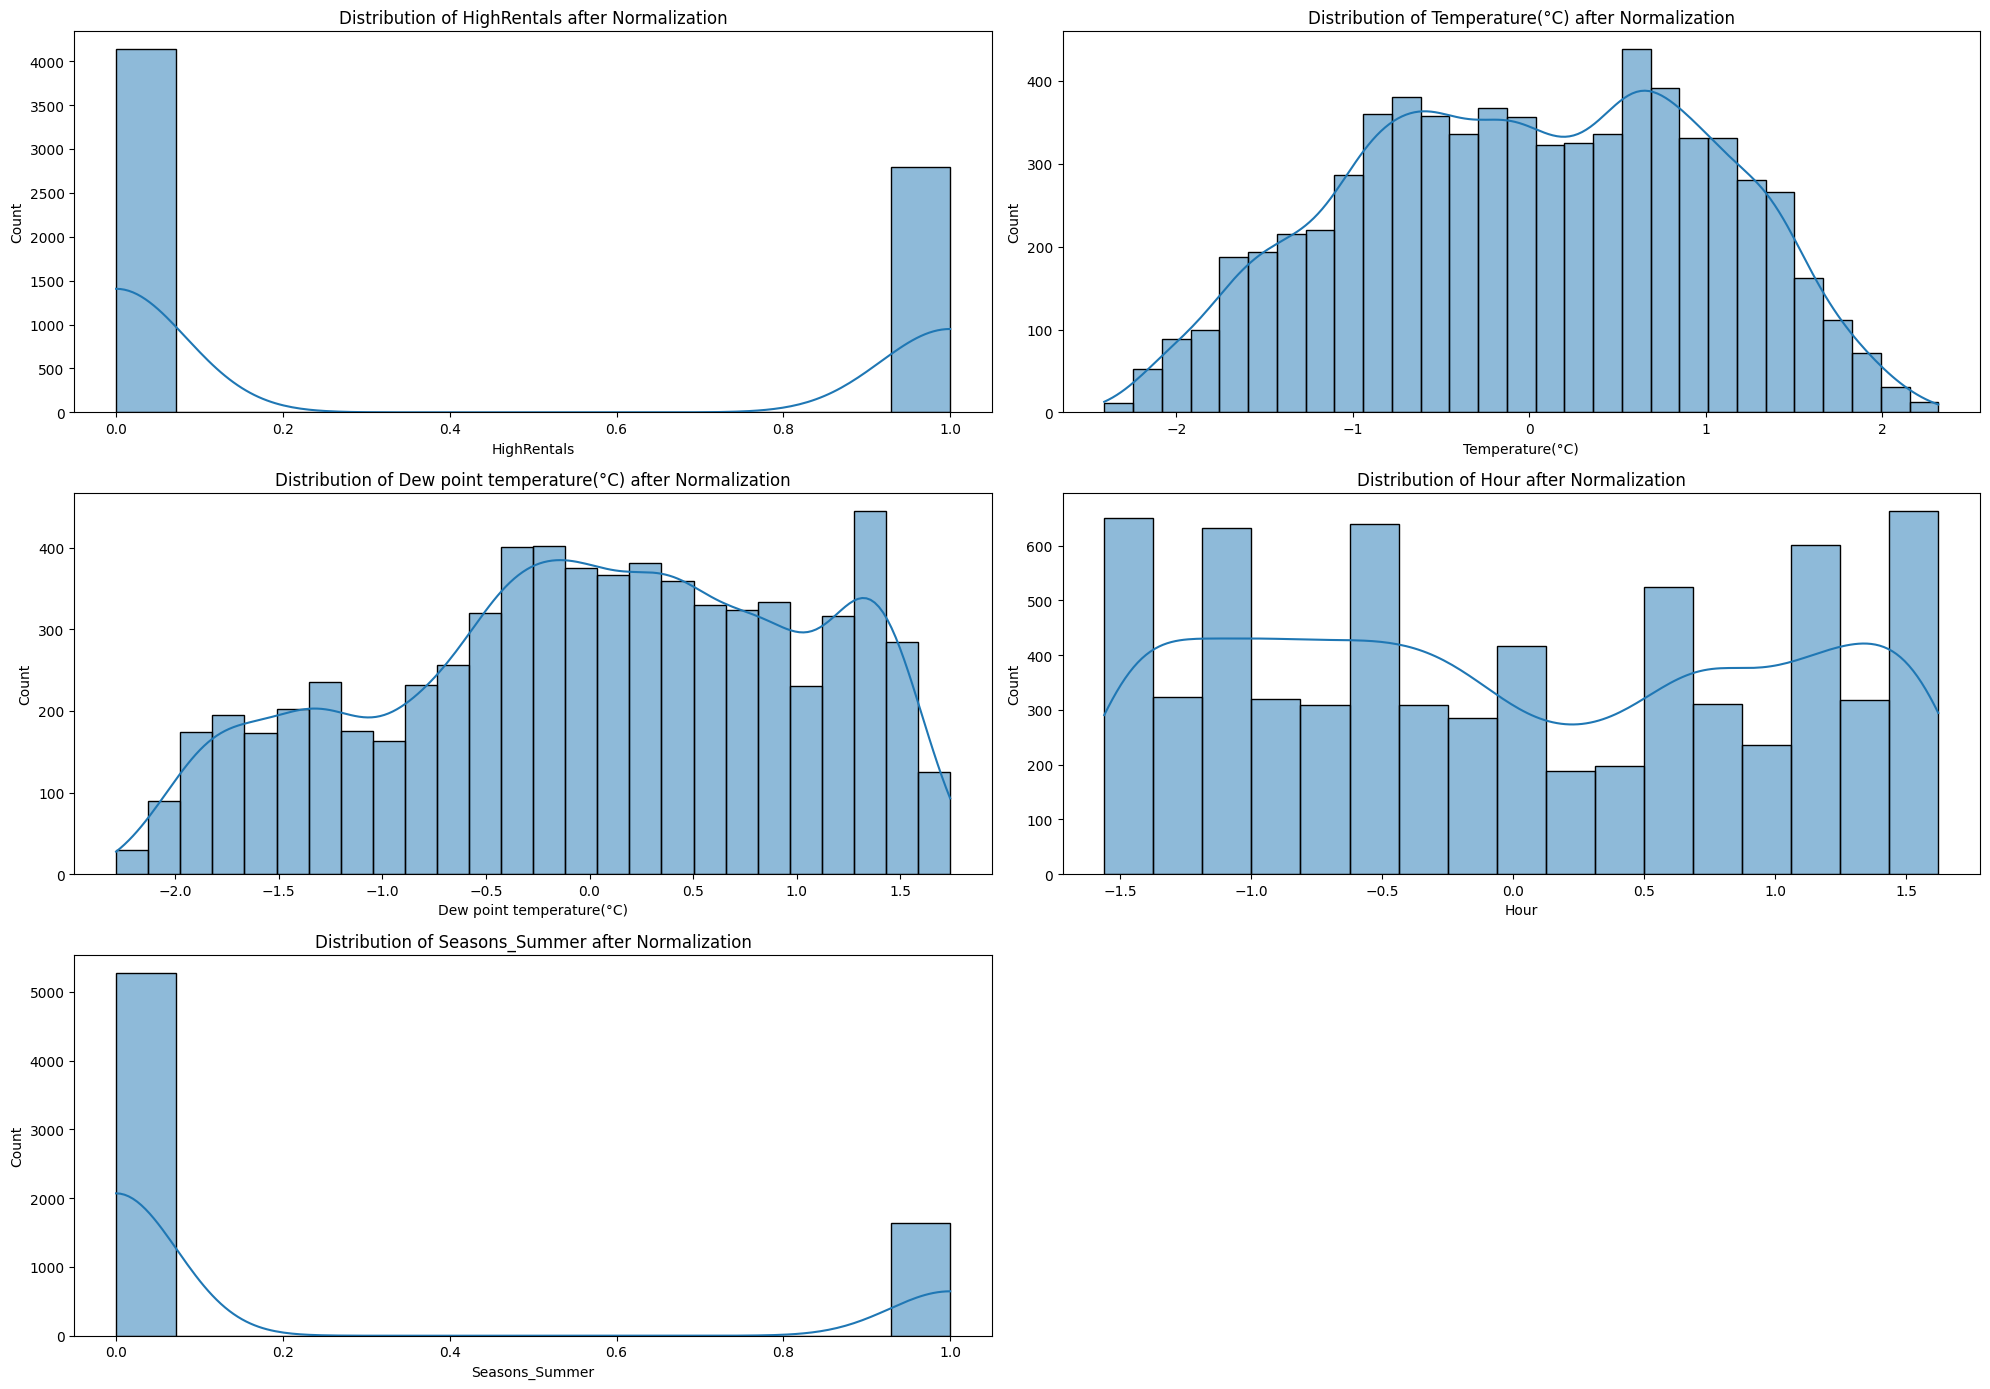

In [ ]:
# Menghitung ulang korelasi setelah normalisasi
correlation_matrix_cleaned = df_cleaned.corr()

# Melihat korelasi dengan 'Rented Bike Count' setelah normalisasi
bike_corr_cleaned = correlation_matrix_cleaned["Rented Bike Count"].sort_values(ascending=False)

# Menampilkan atribut dengan korelasi tertinggi (5 teratas)
high_corr_attributes = bike_corr_cleaned[1:6].index

# Visualisasi distribusi atribut yang berkorelasi tinggi dengan 'Rented Bike Count'
plt.figure(figsize=(20, 14))
for i, col in enumerate(high_corr_attributes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col} after Normalization')
plt.tight_layout()
plt.show()

modelingggg

In [ ]:
# Memuat dataset yang sudah dipersiapkan
df_cleaned = pd.read_csv("/content/drive/MyDrive/awikwok/SeoulBikeData_Cleaned.csv")

# Memisahkan fitur dan target
X = df_cleaned.drop(columns=['Rented Bike Count', 'HighRentals'])
y = df_cleaned['HighRentals']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data latih:", X_train.shape, y_train.shape)
print("Data uji:", X_test.shape, y_test.shape)

Data latih: (5537, 22) (5537,)
Data uji: (1385, 22) (1385,)


2. Pelatihan Model (Training)
Menggunakan berbagai algoritma klasifikasi untuk melatih mode

In [ ]:
# Membuat dan melatih model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Membuat dan melatih model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

 Evaluasi Model
Mengevaluasi performa model dengan metrik yang sesuai.

In [ ]:
# Memprediksi target pada data uji
rf_y_pred = rf_model.predict(X_test)

# Mengevaluasi performa model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Memprediksi target pada data uji
lr_y_pred = lr_model.predict(X_test)

# Mengevaluasi performa model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Random Forest Classifier
Accuracy: 0.9285198555956679
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       822
           1       0.91      0.91      0.91       563

    accuracy                           0.93      1385
   macro avg       0.93      0.93      0.93      1385
weighted avg       0.93      0.93      0.93      1385

Logistic Regression
Accuracy: 0.8469314079422383
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       822
           1       0.82      0.80      0.81       563

    accuracy                           0.85      1385
   macro avg       0.84      0.84      0.84      1385
weighted avg       0.85      0.85      0.85      1385



Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning untuk RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for RandomForestClassifier:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)
print("Tuned Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

# Hyperparameter tuning untuk LogisticRegression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000), param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

print("Best parameters for LogisticRegression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_
lr_y_pred = best_lr_model.predict(X_test)
print("Tuned Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Classifier
Accuracy: 0.9292418772563177
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       822
           1       0.91      0.91      0.91       563

    accuracy                           0.93      1385
   macro avg       0.93      0.93      0.93      1385
weighted avg       0.93      0.93      0.93      1385

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Tuned Logistic Regression
Accuracy: 0.8490974729241877
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       822
           1       0.83      0.80      0.81       563

    accuracy                           0.85      1385
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualisasi Hasil (Opsional)

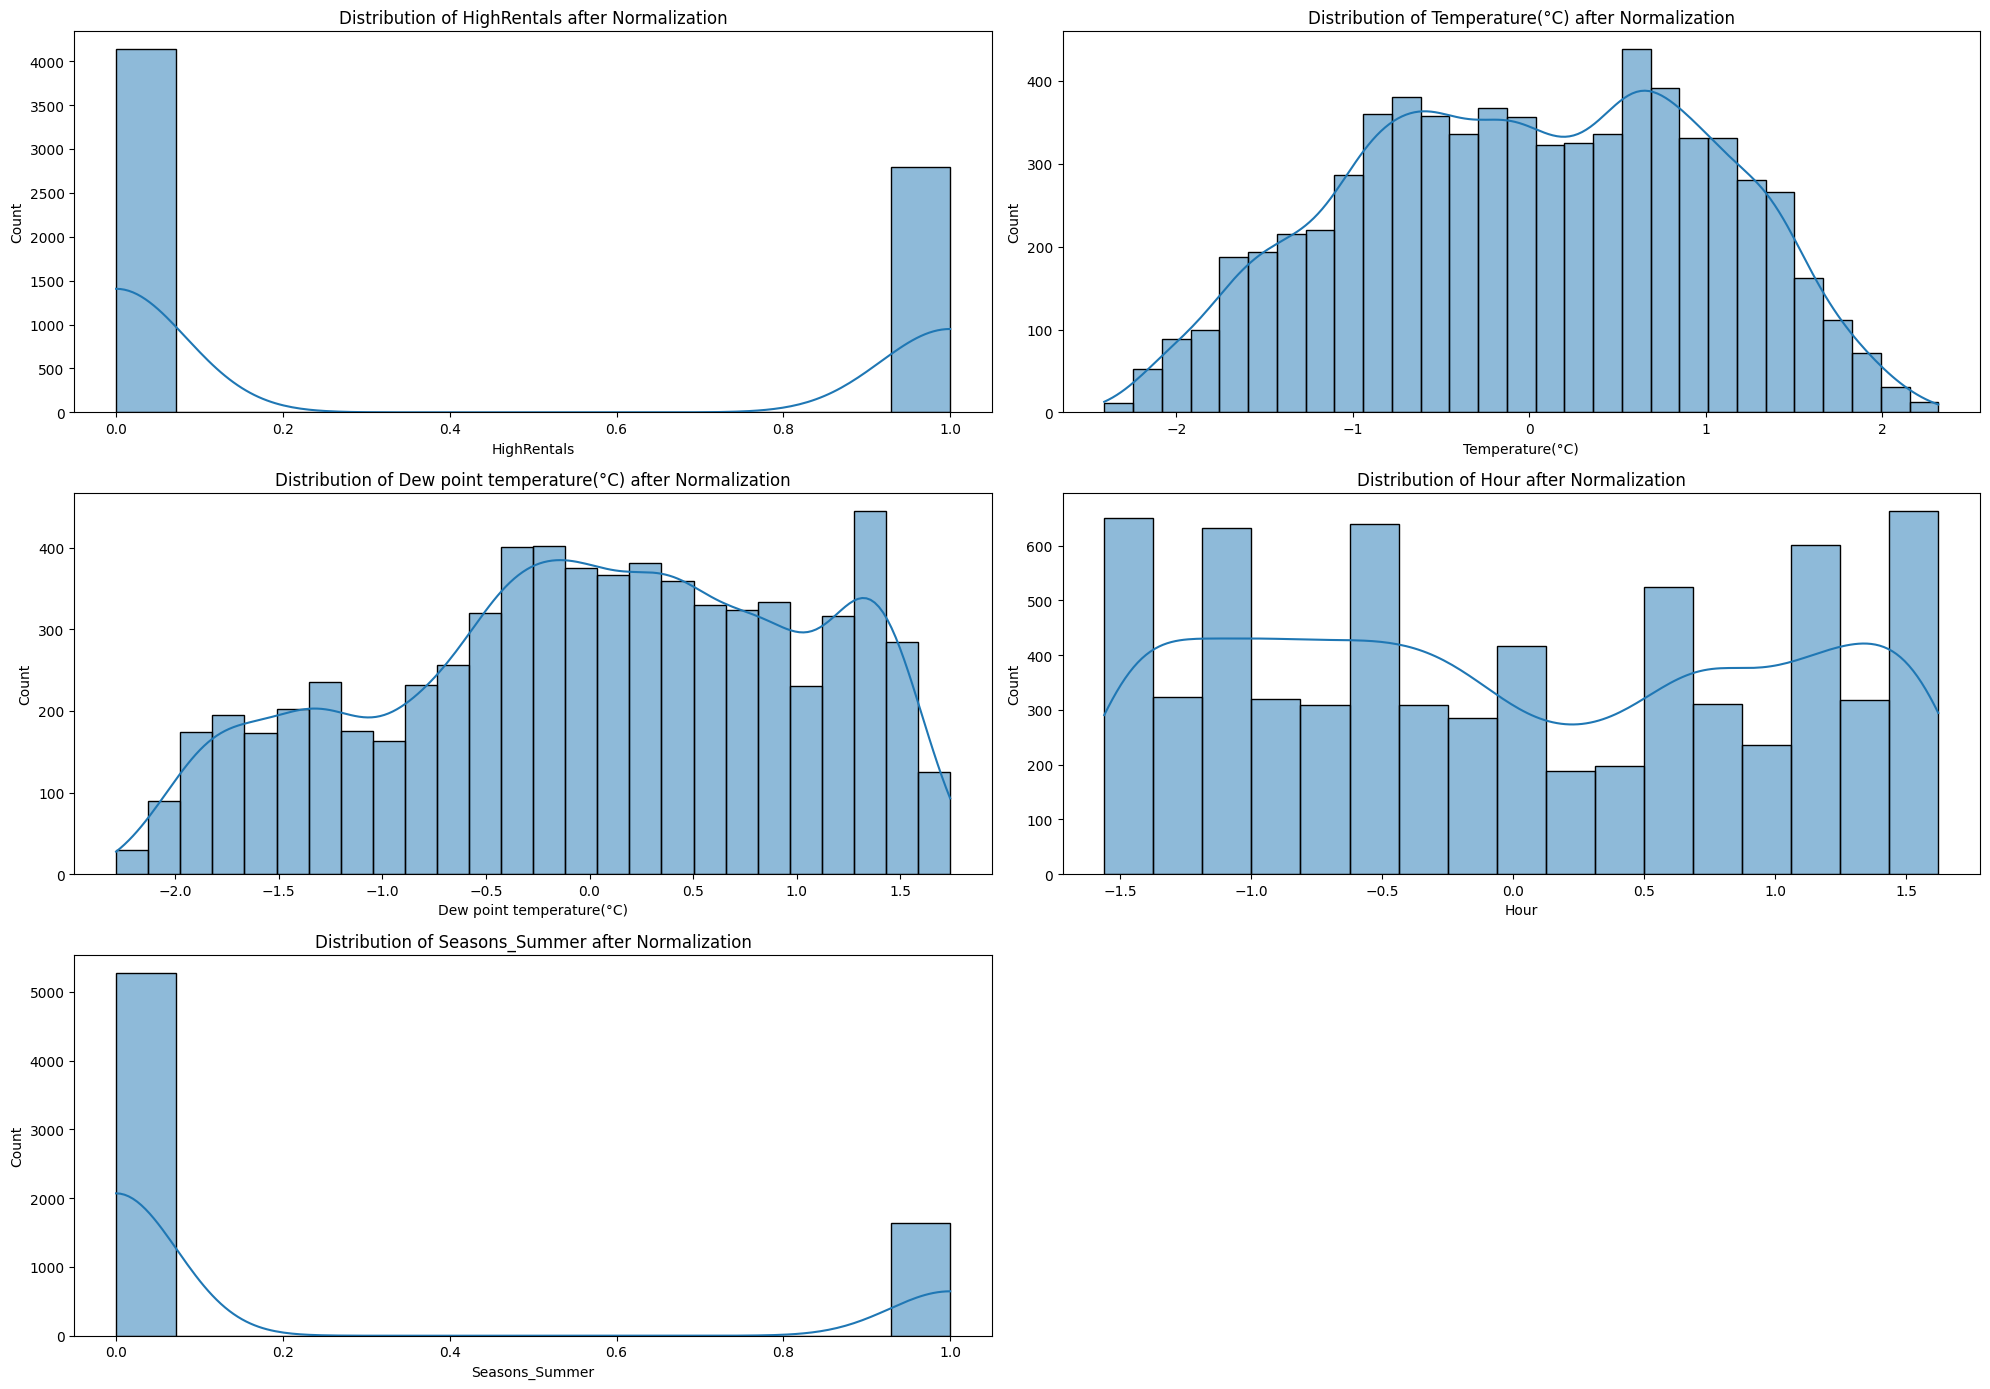

In [ ]:
# Menghitung ulang korelasi setelah normalisasi
correlation_matrix_cleaned = df_cleaned.corr()

# Melihat korelasi dengan 'Rented Bike Count' setelah normalisasi
bike_corr_cleaned = correlation_matrix_cleaned["Rented Bike Count"].sort_values(ascending=False)

# Menampilkan atribut dengan korelasi tertinggi (5 teratas)
high_corr_attributes = bike_corr_cleaned[1:6].index

# Visualisasi distribusi atribut yang berkorelasi tinggi dengan 'Rented Bike Count'
plt.figure(figsize=(20, 14))
for i, col in enumerate(high_corr_attributes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col} after Normalization')
plt.tight_layout()
plt.show()
